# Vehicle Recognition System

## Overview
- In this notebook, we are classifying different vehicle images.
- To do this we first use a Convolutional Neural Networks model. In this part we tried to improve the accuracy of the classification. 
- In the next section, we use the concepts taught in DATA 603 for classification. For example, we used MongoDB for storage of images and Spark for processing.
- We are plotting the the performance metrics with the matplotlib library of python.

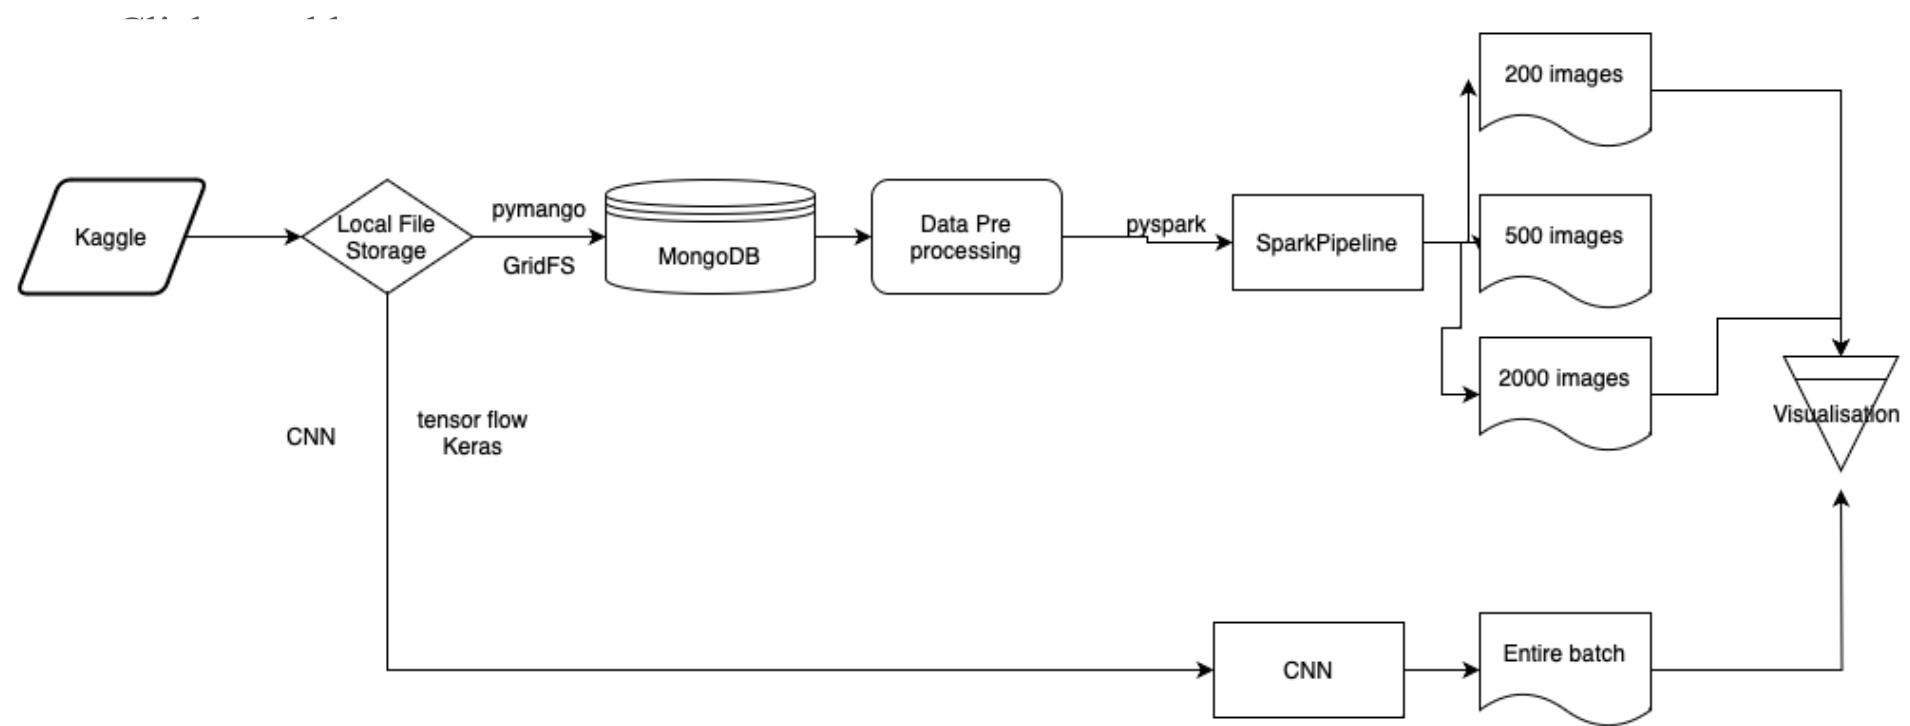

## Running code with Deep Learning Model

In [2]:
!pip3 install matplotlib

In [4]:
import matplotlib.pyplot as plt
  # plotting library
import scipy                     # scientific computnig and technical computing

In [6]:
!pip install --upgrade numpy opencv-python

     --------------------------------------- 15.8/15.8 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.2 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.2 which is incompatible.


In [5]:
import cv2                       
import numpy as np
import glob                     
import os                        
import pandas as pd              
import tensorflow as tf
import itertools
import random
from random import shuffle       
from tqdm import tqdm            
from PIL import Image
from scipy import ndimage
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
%matplotlib inline
np.random.seed(1)
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
!pip install tensorflow

     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ------------------ --------------------- 0.7/1.5 MB 14.6 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 18.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/181.3 kB ? eta -:--:--
     ------------------------------------- 181.3/181.3 kB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/151.7 kB ? eta -:--:--
     -------------------------------------- 151.7/151.7 kB 8.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/300.8 MB ? eta -:--:--
   ---------------------------------------- 2.2/300.8 MB 46.8 MB/s eta 0:00:07
    -------

In [9]:
import glob                     
import os                        
import pandas as pd              
import tensorflow as tf
import itertools
import random

In [25]:
train_dir = '/Users/kaushikmanjunatha/Documents/Kaushik/Kaushik/Master Plan/UMBC/Semester2/603/Project/cardataset/train'
test_dir = '/Users/kaushikmanjunatha/Documents/Kaushik/Kaushik/Master Plan/UMBC/Semester2/603/Project/cardataset//test'

In [26]:
os.listdir(train_dir)

['Ambulance',
 'Barge',
 'Bicycle',
 'Boat',
 'Bus',
 'Car',
 'Cart',
 'Caterpillar',
 'Helicopter',
 'Limousine',
 'Motorcycle',
 'Segway',
 'Snowmobile',
 'Tank',
 'Taxi',
 'Truck',
 'Van']

In [27]:
LR = 1e-3
height=150
width=150
channels=3
seed=1337
batch_size = 64
num_classes = 17
epochs = 5
data_augmentation = True
num_predictions = 20

In [28]:
# Training generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [29]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    shuffle=True,
                                                    class_mode='categorical')

Found 22852 images belonging to 17 classes.


In [30]:
# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  shuffle=True,
                                                  class_mode='categorical')

Found 5193 images belonging to 17 classes.


In [31]:
train_num = train_generator.samples
validation_num = validation_generator.samples

In [32]:
x,y=validation_generator.next()

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [35]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [36]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [37]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [38]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                  

In [39]:
history = model.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=5,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              verbose = 1
                             )

C:\Users\siddh\AppData\Local\Temp\ipykernel_27248\2338602991.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/5


357/357 [==============================] - 352s 983ms/step - loss: 1.7904 - acc: 0.4149 - val_loss: 1.5841 - val_acc: 0.4888
Epoch 2/5
357/357 [==============================] - 377s 1s/step - loss: 1.5582 - acc: 0.4921 - val_loss: 1.4674 - val_acc: 0.5137
Epoch 3/5
357/357 [==============================] - 342s 958ms/step - loss: 1.4394 - acc: 0.5317 - val_loss: 1.3291 - val_acc: 0.5714
Epoch 4/5
357/357 [==============================] - 324s 906ms/step - loss: 1.3854 - acc: 0.5517 - val_loss: 1.3949 - val_acc: 0.5347
Epoch 5/5
357/357 [==============================] - 318s 890ms/step - loss: 1.3369 - acc: 0.5609 - val_loss: 1.2260 - val_acc: 0.6013


In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

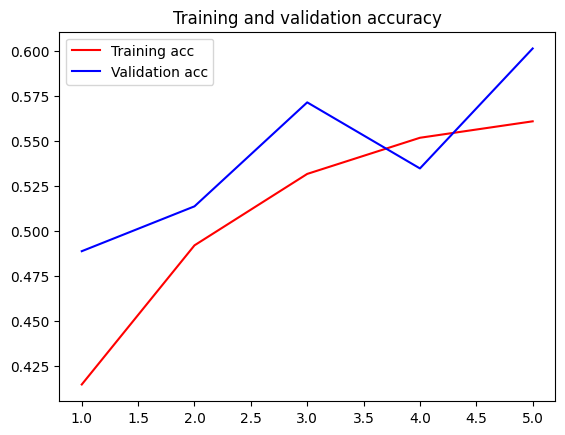

In [41]:
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

### After the 5th epoch, we have achieved an accuracy of 60% using the above deep learning model

In [44]:
score = model.evaluate(validation_generator)

82/82 [==============================] - 46s 558ms/step - loss: 1.5492 - acc: 0.5415


In [45]:
score

[1.549248456954956, 0.5414981842041016]

In [46]:

predictions = model.predict(validation_generator)

82/82 [==============================] - 44s 536ms/step


In [47]:
#finding the index of the maximum probability for each prediction
predicted_classes = predictions.argmax(axis=-1)

In [48]:
#predicted classes
print(predicted_classes)

[10 10  5 ...  5  3  5]


In [49]:
predictions[1]

array([5.5792480e-05, 6.2354615e-05, 1.7456020e-01, 8.6072963e-03,
       2.1192946e-03, 3.8526673e-02, 2.7657067e-04, 6.6291174e-04,
       8.6398702e-04, 5.5290743e-06, 7.5515604e-01, 3.5273572e-04,
       3.2556022e-04, 7.3020405e-04, 5.6661986e-04, 1.6740534e-02,
       3.8763686e-04], dtype=float32)

In [50]:
predictions

array([[3.46648577e-03, 6.15999475e-03, 2.00888351e-01, ...,
        2.12325882e-02, 6.34540766e-02, 1.24543505e-02],
       [5.57924795e-05, 6.23546148e-05, 1.74560204e-01, ...,
        5.66619856e-04, 1.67405345e-02, 3.87636857e-04],
       [1.71078113e-03, 1.50331785e-03, 7.89988786e-03, ...,
        5.83839556e-03, 1.29611239e-01, 3.27376761e-02],
       ...,
       [7.32307730e-04, 2.05540378e-03, 6.87429507e-04, ...,
        7.58315530e-03, 3.60978954e-02, 3.55020389e-02],
       [7.44584017e-03, 1.45980231e-02, 1.10498928e-02, ...,
        2.83386745e-02, 1.01718672e-01, 3.39899249e-02],
       [3.34666483e-02, 1.07897067e-04, 3.08820425e-04, ...,
        7.30706239e-03, 2.49830708e-01, 6.15200549e-02]], dtype=float32)

In [51]:
def predict(out):
    if out==0:
        pred = 'Barge'
    elif out==1:
        pred='Snowmobile'
    elif out==2:
        pred='Tank'
    elif out==3:
        pred='Car'
    elif out==4:
        pred='Truck'
    elif out==5:
        pred='Helicopter'
    elif out==6:
        pred='Bicycle'
    elif out==7:
        pred='Segway'
    elif out==8:
        pred='Cart'
    elif out==9:
        pred='Caterpillar'
    elif out==10:
        pred='Motorcycle'
    elif out==11:
        pred='Ambulance'
    elif out==12:
        pred='Motorcycle'
    elif out==13:
        pred='Ambulance'
    elif out==14:
        pred='Taxi'
    elif out==15:
        pred='Bus'
    elif out==16:
        pred='Van'
    elif out==17:
        pred='Boat'    
    else:
        pred="Limousine"
    return pred

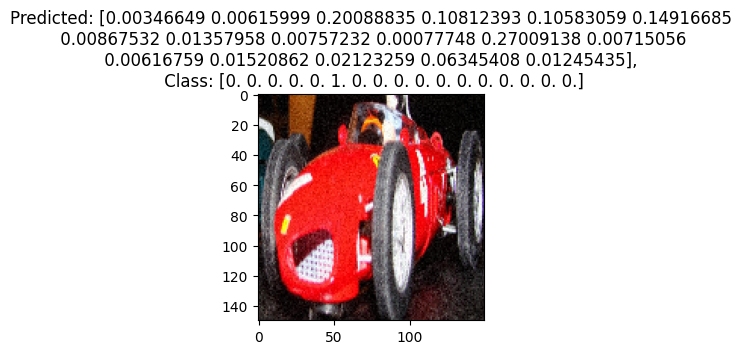

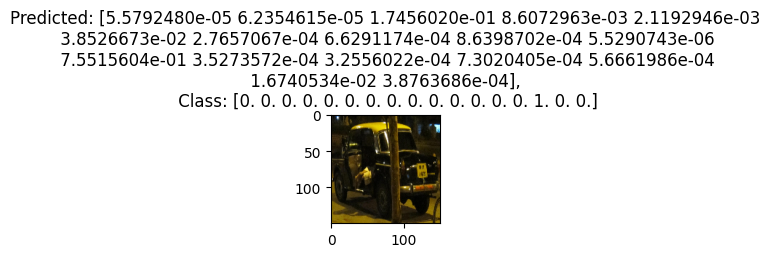

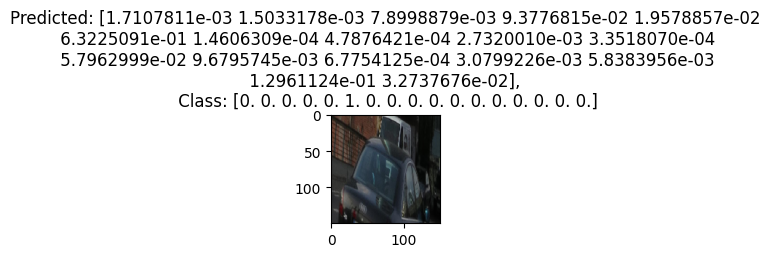

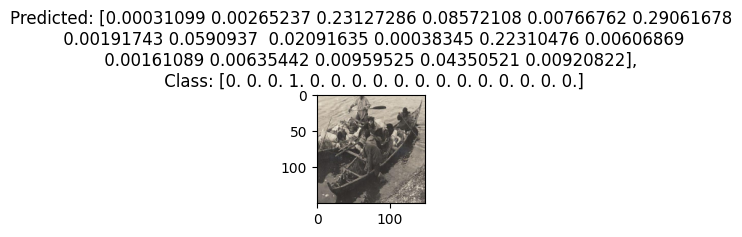

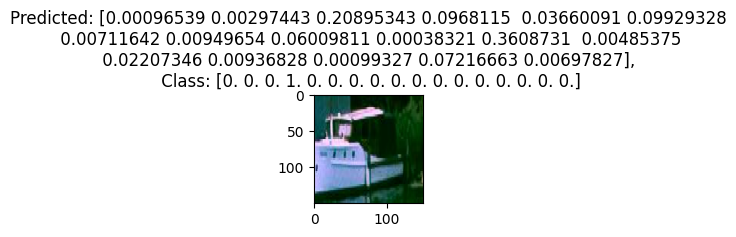

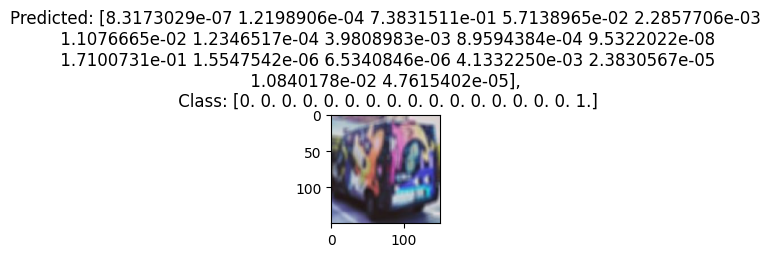

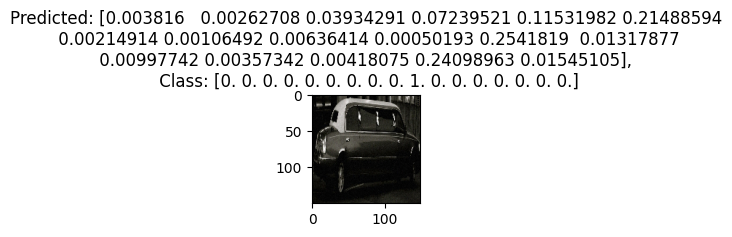

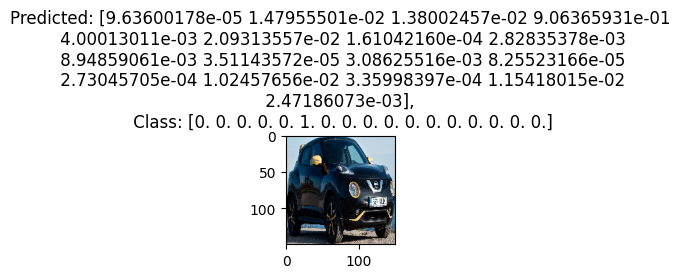

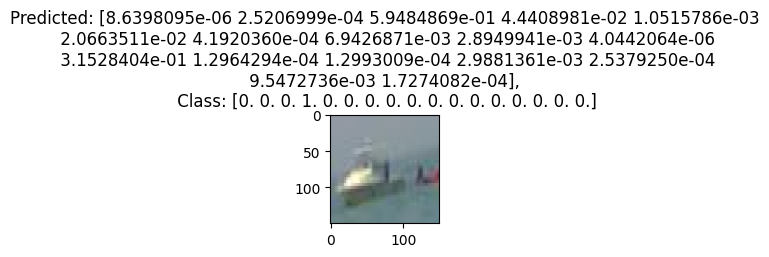

In [52]:
x,y = validation_generator.next()
plt.figure(figsize=(20,10))
for i in range(0,9):
    image = x[i]
    pred=predictions[i]
    actual=y[i]
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title(f"Predicted: {pred}, \n Class: {actual}")
    plt.show()

## Integrating MongoDB and pySpark to Classify the Vehicle Classes

In [57]:
from pymongo import MongoClient
import gridfs
from PIL import Image
import io

## Considering a Batch Size of 4000+ Images

In [60]:
import os
import cv2
import numpy as np
from pymongo import MongoClient
import gridfs
from PIL import Image
import io
from pyspark.sql import SparkSession
from pyspark.sql.types import Row
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vectors
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# connect to MongoDB
client = MongoClient('localhost', 27017)
db = client['image_db_up_9']
fs = gridfs.GridFS(db, collection='vehicleimages')

# Store images with labels in MongoDB 
base_directory_path = '/Users/kaushikmanjunatha/Documents/Kaushik/Kaushik/Master Plan/UMBC/Semester2/603/Project/cardataset/test'
subdirectories = [d for d in os.listdir(base_directory_path) if os.path.isdir(os.path.join(base_directory_path, d))]

for subdirectory in subdirectories:
    subdirectory_path = os.path.join(base_directory_path, subdirectory)
    files = os.listdir(subdirectory_path)

    for file_name in files:
        file_path = os.path.join(subdirectory_path, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'rb') as img_file:
                image_data = img_file.read()
                fs.put(image_data, filename=file_name, metadata={'label': subdirectory})

# process an image file
def process_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))
    img = img.flatten() / 255.0
    return img.tolist()

# Load and process images from file system subdirectories
def load_and_process_images(base_directory):
    categories = os.listdir(base_directory)
    image_data = []

    for category in categories:
        dir_path = os.path.join(base_directory, category)

        if os.path.isdir(dir_path):
            label = category

            for file in os.listdir(dir_path):
                if file.endswith(('jpg', 'png', 'jpeg')):
                    file_path = os.path.join(dir_path, file)
                    processed_img = process_image(file_path)
                    image_data.append((label, Vectors.dense(processed_img)))

    return spark.createDataFrame(image_data, ["label", "features"])

# Fetch images and labels from MongoDB
def get_images_from_mongodb(fs):
    data = []
    for grid_out in fs.find():
        label = grid_out.metadata['label']
        image = Image.open(io.BytesIO(grid_out.read())).convert('L')
        image = np.array(image.resize((32, 32)))
        image_array = image.flatten() / 255.0
        data.append(Row(label=label, features=Vectors.dense(image_array)))
    return data




In [61]:
# Initialize Spark Session
spark = SparkSession.builder.appName("ImageClassification").getOrCreate()

# Start timer for fetching and processing images from MongoDB
start_time = time.time()

# Fetch and process images from MongoDB
mongodb_image_data = get_images_from_mongodb(fs)
mongodb_image_df = spark.createDataFrame(mongodb_image_data)

# End timer
end_time = time.time()

# Calculate and print time taken
time_taken = end_time - start_time
print(f"Time taken to fetch and process images: {time_taken} seconds")

Time taken to fetch and process images: 98.76079893112183 seconds


In [62]:
mongodb_image_df.groupBy("label").count().show()

23/12/10 17:08:47 WARN TaskSetManager: Stage 491 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.


+----------+-----+
|     label|count|
+----------+-----+
| Limousine|   63|
|       Car| 1391|
|      Tank|   85|
|Motorcycle|  797|
|       Van|  396|
|       Bus|  351|
|     Truck|  559|
| Ambulance|   44|
|   Bicycle|  122|
|      Taxi|  221|
+----------+-----+



In [53]:
mongodb_image_df.count()

23/12/10 16:49:44 WARN TaskSetManager: Stage 415 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.


4029

In [63]:
import time
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

# Indexing labels
indexer = StringIndexer(inputCol="label", outputCol="indexedLabel")

# Start timer for indexing
start_indexing_time = time.time()

# Perform indexing
indexed_df = indexer.fit(mongodb_image_df).transform(mongodb_image_df)

# End timer for indexing
end_indexing_time = time.time()
print(f"Time taken for indexing: {end_indexing_time - start_indexing_time} seconds")

# Define batch size
batch_size = 0.001  # Adjust as needed

# Split data into batches
chunks = indexed_df.randomSplit([batch_size, 1 - batch_size])

# Create a RandomForestClassifier model
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="features", numTrees=10)

# Create a pipeline
pipeline = Pipeline(stages=[rf])

# Start timer for model training
start_training_time = time.time()

# Initialize the model with the first batch
initial_batch = chunks[0]
model = pipeline.fit(initial_batch)

# Train the model on the remaining batches
for chunk in chunks[1:]:
    model = pipeline.fit(chunk)

# End timer for model training
end_training_time = time.time()
print(f"Time taken for model training: {end_training_time - start_training_time} seconds")

# Split the data into training and test sets
train_df, test_df = indexed_df.randomSplit([0.8, 0.2])

# Start timer for making predictions
start_prediction_time = time.time()

# Make predictions on the test dataset
predictions = model.transform(test_df)

# End timer for making predictions
end_prediction_time = time.time()
print(f"Time taken for making predictions: {end_prediction_time - start_prediction_time} seconds")

23/12/10 17:10:39 WARN TaskSetManager: Stage 494 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.


Time taken for indexing: 1.5912740230560303 seconds


23/12/10 17:10:41 WARN TaskSetManager: Stage 497 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 17:10:41 WARN TaskSetManager: Stage 498 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 17:10:42 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 3 (= number of training instances)
23/12/10 17:10:42 WARN TaskSetManager: Stage 499 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 17:10:43 WARN TaskSetManager: Stage 501 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 17:10:44 WARN TaskSetManager: Stage 503 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 17:10:44 WARN TaskSetManager: Stage 505 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 17:10:44 WAR

Time taken for model training: 8.350465059280396 seconds
Time taken for making predictions: 0.038159847259521484 seconds


In [46]:

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy = {accuracy}")

23/12/10 16:18:36 WARN TaskSetManager: Stage 321 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.


Test Accuracy = 0.4814356435643564


23/12/10 16:18:43 WARN TaskSetManager: Stage 323 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 16:18:44 WARN TaskSetManager: Stage 326 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 16:18:45 WARN TaskSetManager: Stage 329 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.


Correctly identified images: 389
Incorrectly identified images: 419


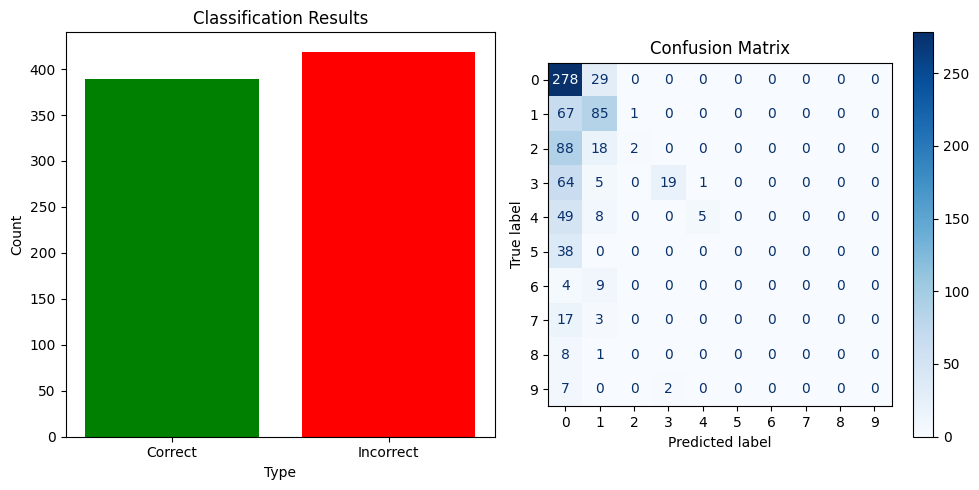

In [47]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import when, col


predictions_with_accuracy = predictions.withColumn('is_correct', when(col('indexedLabel') == col('prediction'), 1).otherwise(0))

correct_predictions = predictions_with_accuracy.filter(predictions_with_accuracy.is_correct == 1).count()
incorrect_predictions = predictions_with_accuracy.filter(predictions_with_accuracy.is_correct == 0).count()

print(f"Correctly identified images: {correct_predictions}")
print(f"Incorrectly identified images: {incorrect_predictions}")

# Convert to Pandas DataFrame for plotting
pandas_df = predictions_with_accuracy.toPandas()

# Plotting
plt.figure(figsize=(10, 5))

# Bar plot for correct and incorrect predictions
plt.subplot(1, 2, 1)
plt.bar(['Correct', 'Incorrect'], [correct_predictions, incorrect_predictions], color=['green', 'red'])
plt.title('Classification Results')
plt.xlabel('Type')
plt.ylabel('Count')

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(pandas_df['indexedLabel'], pandas_df['prediction'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 2))
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

## Conidering a Batch Size of 200 Images

In [64]:
import time
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Assuming indexer and mongodb_image_df are already defined

# Perform indexing
indexed_df = indexer.fit(mongodb_image_df).transform(mongodb_image_df)

# Limit the DataFrame to 250 images
limited_df = indexed_df.limit(250)

# Split into training and test sets
train_df, test_df = limited_df.randomSplit([0.8, 0.2])

# Create RandomForestClassifier with indexed labels
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="features", numTrees=10)

# Create a pipeline
pipeline = Pipeline(stages=[rf])

# Start timer for model training
start_train_time = time.time()

# Fit the model on the entire training dataset
model = pipeline.fit(train_df)

# End timer for model training
end_train_time = time.time()
train_time = end_train_time - start_train_time
print(f"Training Time: {train_time} seconds")

# Start timer for making predictions
start_pred_time = time.time()

# Make predictions on the test dataset
predictions = model.transform(test_df)

# End timer for making predictions
end_pred_time = time.time()
pred_time = end_pred_time - start_pred_time
print(f"Prediction Time: {pred_time} seconds")

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy = {accuracy}")

23/12/10 17:12:59 WARN TaskSetManager: Stage 519 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 17:13:00 WARN TaskSetManager: Stage 522 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 17:13:01 WARN TaskSetManager: Stage 523 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 17:13:03 WARN TaskSetManager: Stage 546 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.


Training Time: 3.6296589374542236 seconds
Prediction Time: 0.045600175857543945 seconds


23/12/10 17:13:04 WARN TaskSetManager: Stage 547 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.


Test Accuracy = 0.7254901960784313


23/12/10 16:19:19 WARN TaskSetManager: Stage 365 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 16:19:20 WARN TaskSetManager: Stage 368 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.


Correctly identified images: 39
Incorrectly identified images: 12


23/12/10 16:19:20 WARN TaskSetManager: Stage 371 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.


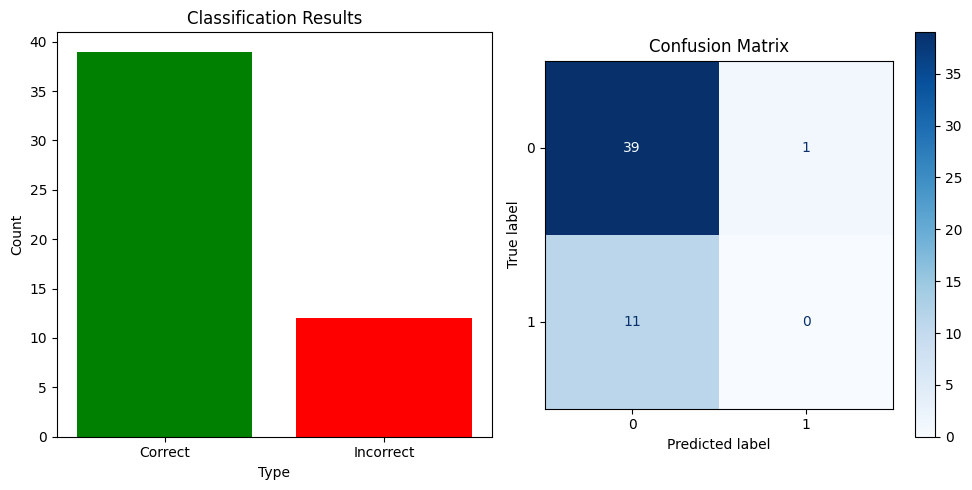

In [50]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import when, col


predictions_with_accuracy = predictions.withColumn('is_correct', when(col('indexedLabel') == col('prediction'), 1).otherwise(0))

correct_predictions = predictions_with_accuracy.filter(predictions_with_accuracy.is_correct == 1).count()
incorrect_predictions = predictions_with_accuracy.filter(predictions_with_accuracy.is_correct == 0).count()

print(f"Correctly identified images: {correct_predictions}")
print(f"Incorrectly identified images: {incorrect_predictions}")

# Convert to Pandas DataFrame for plotting
pandas_df = predictions_with_accuracy.toPandas()

# Plotting
plt.figure(figsize=(10, 5))

# Bar plot for correct and incorrect predictions
plt.subplot(1, 2, 1)
plt.bar(['Correct', 'Incorrect'], [correct_predictions, incorrect_predictions], color=['green', 'red'])
plt.title('Classification Results')
plt.xlabel('Type')
plt.ylabel('Count')

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(pandas_df['indexedLabel'], pandas_df['prediction'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 2))
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

## Conidering a Batch Size of 500 Images

In [55]:
import time
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Your existing code for indexer and DataFrame preparation
indexed_df = indexer.fit(mongodb_image_df).transform(mongodb_image_df)

# Limit the DataFrame to 600 images
limited_df = indexed_df.limit(600)

# Split into training and test sets
train_df, test_df = limited_df.randomSplit([0.8, 0.2])

# Create RandomForestClassifier with indexed labels
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="features", numTrees=10)

# Create a pipeline
pipeline = Pipeline(stages=[rf])

# Start timer for model training
start_train_time = time.time()

# Fit the model on the entire training dataset
model = pipeline.fit(train_df)

# End timer for model training
end_train_time = time.time()

# Calculate and print training time
train_time = end_train_time - start_train_time
print(f"Training Time: {train_time} seconds")

# Start timer for making predictions
start_pred_time = time.time()

# Make predictions on the test dataset
predictions = model.transform(test_df)

# End timer for making predictions
end_pred_time = time.time()

# Calculate and print prediction time
pred_time = end_pred_time - start_pred_time
print(f"Prediction Time: {pred_time} seconds")

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy = {accuracy}")

23/12/10 16:59:13 WARN TaskSetManager: Stage 450 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 16:59:13 WARN TaskSetManager: Stage 453 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 16:59:14 WARN TaskSetManager: Stage 454 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 16:59:16 WARN TaskSetManager: Stage 477 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.


Training Time: 2.7717320919036865 seconds
Prediction Time: 0.031075000762939453 seconds


23/12/10 16:59:16 WARN TaskSetManager: Stage 478 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.


Test Accuracy = 0.905982905982906


23/12/10 16:59:25 WARN TaskSetManager: Stage 482 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 16:59:26 WARN TaskSetManager: Stage 485 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.
23/12/10 16:59:27 WARN TaskSetManager: Stage 488 contains a task of very large size (4545 KiB). The maximum recommended task size is 1000 KiB.


Correctly identified images: 106
Incorrectly identified images: 11


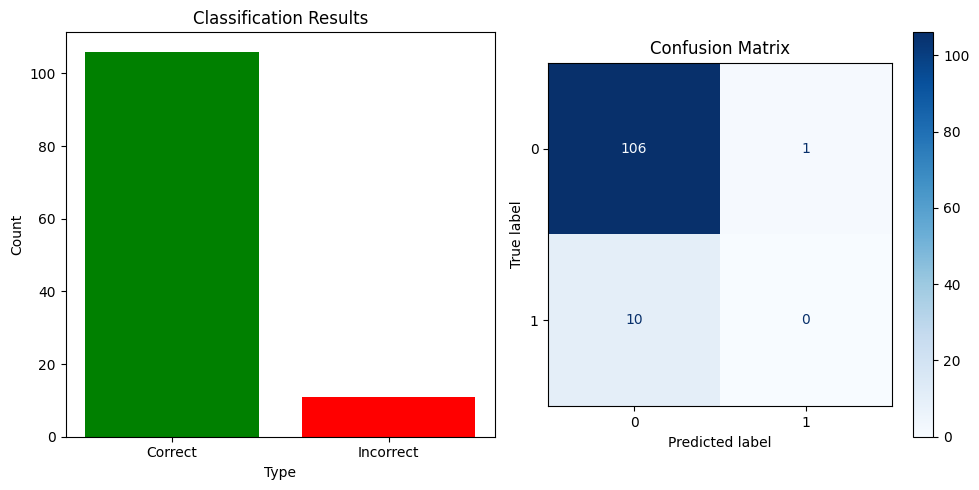

In [56]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import when, col


predictions_with_accuracy = predictions.withColumn('is_correct', when(col('indexedLabel') == col('prediction'), 1).otherwise(0))

correct_predictions = predictions_with_accuracy.filter(predictions_with_accuracy.is_correct == 1).count()
incorrect_predictions = predictions_with_accuracy.filter(predictions_with_accuracy.is_correct == 0).count()

print(f"Correctly identified images: {correct_predictions}")
print(f"Incorrectly identified images: {incorrect_predictions}")

# Convert to Pandas DataFrame for plotting
pandas_df = predictions_with_accuracy.toPandas()

# Plotting
plt.figure(figsize=(10, 5))

# Bar plot for correct and incorrect predictions
plt.subplot(1, 2, 1)
plt.bar(['Correct', 'Incorrect'], [correct_predictions, incorrect_predictions], color=['green', 'red'])
plt.title('Classification Results')
plt.xlabel('Type')
plt.ylabel('Count')

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(pandas_df['indexedLabel'], pandas_df['prediction'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 2))
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

## Conclusion

### Performance Metrics
- Time taken to fetch and process images: 98.76079893112183 seconds
- For batch size 200 : Test Accuracy of 76.47%
    * Training Time: 3.6296589374542236 seconds
    * Prediction Time: 0.045600175857543945 seconds
- For batch size 500 : Test Accuracy of 90.59%
    * Training Time: 2.7717320919036865 seconds
    * Prediction Time: 0.031075000762939453 seconds
- For batch size 4000+ : Test Accuracy of 48.14%
    * Time taken for model training: 8.350465059280396 seconds
    * Time taken for making predictions: 0.038159847259521484 seconds

